In [1]:
from common import colors, pvalue_thresholds

In [2]:
import os
os.chdir(os.path.join('..', '..', '..'))
print(os.getcwd())

/Users/eharkin/Documents/projects/5HTGIF


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from ezephys import pltools
from statannot import add_stat_annotation

from grr.Tools import stripNan

In [4]:
IMG_PATH = os.path.join('figs', 'ims', 'writeup', 'fig1')
NOTEBOOK_PATH = os.path.join('figs', 'scripts', 'writeup')

plt.style.use(os.path.join(NOTEBOOK_PATH, 'publication_figure_style.dms'))

In [5]:
data = {
    celltype: pd.read_csv(os.path.join('data', 'processed', celltype, 'transient_current_parameters.csv'))
    for celltype in ['5HT', 'GABA', 'mPFC']
}
for celltype in data:
    data[celltype]['cell_type'] = celltype
param_df = pd.concat([data[celltype] for celltype in data], axis=0)
param_df.reset_index(drop=True, inplace=True)

param_df

,inactivation_taus,peak_conductance,peak_exists,peak_latencies,steady_state_amplitudes,steady_state_conductance,cell_type
0,39.280178,12.320388,True,7.7,97.607349,1.952147,5HT
1,28.866688,18.423373,True,6.3,107.386440,2.147729,5HT
2,32.445161,18.709428,True,5.8,170.499481,3.409990,5HT
3,40.782865,17.101626,True,8.3,220.519097,4.410382,5HT
4,57.185123,25.747945,True,7.9,155.052318,3.101046,5HT
5,44.690907,19.047869,True,7.5,62.802801,1.256056,5HT
6,27.602526,14.981558,True,7.8,151.887616,3.037752,5HT
7,37.392290,21.523440,True,8.0,160.327488,3.206550,5HT
8,49.518003,11.536979,True,7.7,89.449190,1.788984,5HT
9,49.753422,21.112850,True,7.8,167.120445,3.342409,5HT


In [6]:
param_df.groupby('cell_type').mean()

,inactivation_taus,peak_conductance,peak_exists,peak_latencies,steady_state_amplitudes,steady_state_conductance
cell_type,,,,,,
5HT,42.868023,18.574293,1.000000,7.461538,141.791420,2.835828
GABA,234.874073,10.727793,0.727273,27.200000,164.778356,3.295567
mPFC,NaN,NaN,0.000000,NaN,379.909307,7.598186


In [7]:
param_df.groupby('cell_type').sem()

,inactivation_taus,peak_conductance,peak_exists,peak_latencies,steady_state_amplitudes,steady_state_conductance
cell_type,,,,,,
5HT,2.599209,1.380283,0.000000,0.207098,12.604453,0.252089
GABA,77.557321,1.349214,0.140836,6.030903,24.121429,0.482429
mPFC,NaN,NaN,0.000000,NaN,80.373859,1.607477


In [8]:
figsize=(0.7, 1)

p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
o: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
5HT v.s. GABA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.652e-03 U_stat=9.400e+01


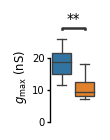

In [9]:
plt.figure(figsize=figsize)

plt.subplot(111)
plt.subplots_adjust(left=0.4, right=0.95, top=0.8, bottom=0.05)
plt.ylim(0, 28)
ax = sns.boxplot(
    'cell_type', 
    'peak_conductance', 
    order=['5HT', 'GABA'], 
    palette=[colors['ser'], colors['som']],
    data=param_df
)
plt.xlabel('')
plt.ylabel(r'$g_\mathrm{max}$ (nS)')
add_stat_annotation(
    ax=ax,
    x='cell_type', 
    y='peak_conductance', 
    order=['5HT', 'GABA'], 
    data=param_df,
    comparisons_correction='bonferroni',
    test='Mann-Whitney',
    box_pairs=[('5HT', 'GABA')],
    pvalue_thresholds=pvalue_thresholds,
    loc='outside'
)
plt.xticks([])
pltools.hide_border('trb', trim=True)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'peak_conductance_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'peak_conductance_comparison.svg'))

p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
o: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
5HT v.s. GABA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.626e-03 U_stat=1.000e+01


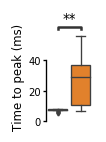

In [10]:
plt.figure(figsize=figsize)

plt.subplot(111)
plt.ylim(0, 59)
plt.subplots_adjust(left=0.4, right=0.95, top=0.8, bottom=0.05)
ax = sns.boxplot(
    'cell_type', 
    'peak_latencies', 
    order=['5HT', 'GABA'], 
    palette=[colors['ser'], colors['som']],
    data=param_df.loc[np.isfinite(param_df['peak_latencies']), :], 
    fliersize=2
)
plt.xlabel('')
plt.ylabel('Time to peak (ms)')
add_stat_annotation(
    ax=ax,
    x='cell_type', 
    y='peak_latencies', 
    order=['5HT', 'GABA'], 
    data=param_df.loc[np.isfinite(param_df['peak_latencies']), :],
    comparisons_correction='bonferroni',
    test='Mann-Whitney',
    box_pairs=[('5HT', 'GABA')],
    pvalue_thresholds=pvalue_thresholds,
    loc='outside'
)
plt.xticks([])
pltools.hide_border('trb', trim=True)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'peak_latency_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'peak_latency_comparison.svg'))

p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
o: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
5HT v.s. GABA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.479e-02 U_stat=2.600e+01


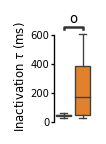

In [11]:
plt.figure(figsize=figsize)

plt.subplot(111)
plt.subplots_adjust(left=0.5, right=0.95, top=0.8, bottom=0.05)
plt.ylim(0, 620)
ax = sns.boxplot(
    'cell_type', 
    'inactivation_taus',
    order=['5HT', 'GABA'], 
    palette=[colors['ser'], colors['som']],
    data=param_df
)
plt.xlabel('')
plt.ylabel(r'Inactivation $\tau$ (ms)')
add_stat_annotation(
    ax=ax,
    x='cell_type', 
    y='inactivation_taus', 
    order=['5HT', 'GABA'], 
    data=param_df.loc[np.isfinite(param_df['inactivation_taus']), :],
    comparisons_correction='bonferroni',
    test='Mann-Whitney',
    box_pairs=[('5HT', 'GABA')],
    pvalue_thresholds=pvalue_thresholds,
    loc='outside'
)
plt.xticks([])
pltools.hide_border('trb', trim=True)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'inactivation_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'inactivation_comparison.svg'))

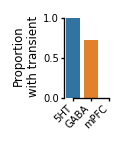

In [12]:
plt.figure(figsize=(1, 1))

plt.subplot(111)
plt.subplots_adjust(left=0.5, right=0.95, top=0.95, bottom=0.25)
sns.barplot(
    'cell_type', 
    'peak_exists', 
    order=['5HT', 'GABA', 'mPFC'], 
    palette=[colors['ser'], colors['som'], colors['pyr']],
    data=param_df, 
    ci=None
)
plt.xlabel('')
plt.ylabel('Proportion\nwith transient')
plt.xticks(rotation=45, ha='right')
pltools.hide_border('tr', trim=True)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'peak_proportion_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'peak_proportion_comparison.svg'))

In [13]:
contingency = [
    [sum(param_df.loc[param_df['cell_type'] == '5HT', 'peak_exists']),
    sum(~param_df.loc[param_df['cell_type'] == '5HT', 'peak_exists'])],
    [sum(param_df.loc[param_df['cell_type'] == 'GABA', 'peak_exists']),
    sum(~param_df.loc[param_df['cell_type'] == 'GABA', 'peak_exists'])],
]
stats.chi2_contingency(contingency)

(1.942057942057942, 0.16344526009542953, 1, array([[11.375,  1.625],
        [ 9.625,  1.375]]))

p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
o: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
5HT v.s. GABA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.200e+01
GABA v.s. mPFC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.181e-01 U_stat=1.200e+01
5HT v.s. mPFC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.902e-02 U_stat=9.000e+00


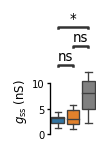

In [14]:
plt.figure(figsize=figsize)

plt.subplot(111)
plt.subplots_adjust(left=0.4, right=0.95, top=0.6, bottom=0.05)
plt.ylim(0, 13)
ax = sns.boxplot(
    'cell_type', 
    'steady_state_conductance',
    order=['5HT', 'GABA', 'mPFC'], 
    palette=[colors['ser'], colors['som'], colors['pyr']],
    data=param_df
)
plt.xlabel('')
plt.ylabel(r'$g_\mathrm{ss}$ (nS)')
add_stat_annotation(
    ax=ax,
    x='cell_type', 
    y='steady_state_conductance', 
    order=['5HT', 'GABA', 'mPFC'], 
    data=param_df.loc[np.isfinite(param_df['steady_state_conductance']), :],
    comparisons_correction='bonferroni',
    test='Mann-Whitney',
    box_pairs=[('5HT', 'GABA'), ('5HT', 'mPFC'), ('GABA', 'mPFC')],
    pvalue_thresholds=pvalue_thresholds,
    loc='outside'
)
plt.xticks([])
pltools.hide_border('trb', trim=True)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'steady_state_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'steady_state_comparison.svg'))